In [23]:
import pandas as pd

In [24]:
df_v1 = pd.read_csv('/Users/umair/Downloads/projects/project_2/data/preprocess/Rockburst_in_Tunnel_V3.csv')

In [25]:
df_v1.head()


,Unnamed: 0,Duration_days,Energy_Unit_log,Energy_density_Joule_sqr,Volume_m3_sqr,Event_freq_unit_per_day_log,Energy_Joule_per_day_sqr,Volume_m3_per_day_sqr,Energy_per_Volume_log,Intensity_Level_encoded
0,0,1.0,0.693147,2.371600,18.576100,0.693147,2.371600,17.792368,0.208654,0
1,1,1.0,0.693147,22.848400,8.910225,0.693147,22.848400,8.910225,0.288938,0
2,2,5.0,3.401197,30.393169,22.819729,1.916923,23.174596,16.630084,1.955967,3
3,3,11.0,1.791759,5.929225,15.038884,0.375006,1.940449,8.042896,0.828257,0
4,4,11.0,2.708050,23.213124,18.198756,0.821101,14.258176,10.400625,1.454365,2


In [26]:
#drop Unnamed
df_v1 = df_v1.drop(columns=['Unnamed: 0'], axis=1)

In [40]:
df_v1.columns

Index(['Duration_days', 'Energy_Unit_log', 'Energy_density_Joule_sqr',
       'Volume_m3_sqr', 'Event_freq_unit_per_day_log',
       'Energy_Joule_per_day_sqr', 'Volume_m3_per_day_sqr',
       'Energy_per_Volume_log', 'Intensity_Level_encoded'],
      dtype='object')

In [27]:
df_v1.describe()

,Duration_days,Energy_Unit_log,Energy_density_Joule_sqr,Volume_m3_sqr,Event_freq_unit_per_day_log,Energy_Joule_per_day_sqr,Volume_m3_per_day_sqr,Energy_per_Volume_log,Intensity_Level_encoded
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,8.466166,2.451214,24.528511,18.813178,0.944573,16.792005,12.029246,1.303947,1.490000
std,4.053318,0.900045,10.572402,4.948378,0.427540,8.159892,3.384080,0.616659,1.120337
min,0.913154,0.671321,0.533291,7.275531,0.144454,-0.167557,2.767655,0.200322,0.000000
25%,5.066297,1.799373,19.271873,15.105369,0.689051,11.993027,9.681555,0.831573,0.000000
50%,8.830382,2.473346,23.586512,19.285100,0.888821,16.224897,12.836993,1.286023,1.000000
75%,10.915463,3.133383,33.485338,22.888978,1.208827,23.520190,14.282274,1.715136,2.000000
max,16.688039,3.930137,42.023571,26.140775,1.938654,32.033348,17.831270,2.391327,3.000000


In [28]:
df_v1.tail()

,Duration_days,Energy_Unit_log,Energy_density_Joule_sqr,Volume_m3_sqr,Event_freq_unit_per_day_log,Energy_Joule_per_day_sqr,Volume_m3_per_day_sqr,Energy_per_Volume_log,Intensity_Level_encoded
995,10.961892,3.744226,35.551198,22.101972,1.552680,24.185248,13.304769,2.264111,3
996,5.973271,2.637072,19.382871,19.625581,1.152048,13.079608,13.289764,1.366179,1
997,4.044154,1.619045,21.234970,13.677697,0.693711,15.901132,9.702540,0.747772,1
998,1.976988,1.098587,3.766872,10.496657,0.691412,2.777449,8.663901,0.480834,0
999,10.010743,3.907413,37.724586,25.989094,1.928437,26.530561,17.287990,2.364591,3


In [29]:
# Check data shape and basic information
print("Dataset shape:", df_v1.shape)
print("\nColumn names:")
print(df_v1.columns.tolist())
print("\nData types:")
print(df_v1.dtypes)
print("\nTarget variable distribution:")
print(df_v1['Intensity_Level_encoded'].value_counts().sort_index())

Dataset shape: (1000, 9)

Column names:
['Duration_days', 'Energy_Unit_log', 'Energy_density_Joule_sqr', 'Volume_m3_sqr', 'Event_freq_unit_per_day_log', 'Energy_Joule_per_day_sqr', 'Volume_m3_per_day_sqr', 'Energy_per_Volume_log', 'Intensity_Level_encoded']

Data types:
Duration_days                  float64
Energy_Unit_log                float64
Energy_density_Joule_sqr       float64
Volume_m3_sqr                  float64
Event_freq_unit_per_day_log    float64
Energy_Joule_per_day_sqr       float64
Volume_m3_per_day_sqr          float64
Energy_per_Volume_log          float64
Intensity_Level_encoded          int64
dtype: object

Target variable distribution:
Intensity_Level_encoded
0    254
1    250
2    248
3    248
Name: count, dtype: int64


In [30]:
# Check for missing values and data quality issues
print("Missing values:")
print(df_v1.isnull().sum())
print("\nAny duplicate rows:", df_v1.duplicated().sum())
print("\nAny infinite values:")
import numpy as np
for col in df_v1.select_dtypes(include=[np.number]).columns:
    inf_count = np.isinf(df_v1[col]).sum()
    if inf_count > 0:
        print(f"{col}: {inf_count}")
print("No infinite values found!" if not any(np.isinf(df_v1.select_dtypes(include=[np.number])).any()) else "")

Missing values:
Duration_days                  0
Energy_Unit_log                0
Energy_density_Joule_sqr       0
Volume_m3_sqr                  0
Event_freq_unit_per_day_log    0
Energy_Joule_per_day_sqr       0
Volume_m3_per_day_sqr          0
Energy_per_Volume_log          0
Intensity_Level_encoded        0
dtype: int64

Any duplicate rows: 0

Any infinite values:
No infinite values found!


In [31]:
# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Prepare the data for modeling
# Separate features and target variable
X = df_v1.drop('Intensity_Level_encoded', axis=1)
y = df_v1['Intensity_Level_encoded']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature names:")
print(X.columns.tolist())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print("\nTraining set target distribution:")
print(y_train.value_counts().sort_index())
print("\nTesting set target distribution:")
print(y_test.value_counts().sort_index())

Features shape: (1000, 8)
Target shape: (1000,)

Feature names:
['Duration_days', 'Energy_Unit_log', 'Energy_density_Joule_sqr', 'Volume_m3_sqr', 'Event_freq_unit_per_day_log', 'Energy_Joule_per_day_sqr', 'Volume_m3_per_day_sqr', 'Energy_per_Volume_log']

Training set size: 800
Testing set size: 200

Training set target distribution:
Intensity_Level_encoded
0    203
1    200
2    198
3    199
Name: count, dtype: int64

Testing set target distribution:
Intensity_Level_encoded
0    51
1    50
2    50
3    49
Name: count, dtype: int64


In [33]:
# Scale the features (especially important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print("Original feature ranges:")
print(f"Min: {X_train.min().min():.3f}, Max: {X_train.max().max():.3f}")
print("Scaled feature ranges:")
print(f"Min: {X_train_scaled.min():.3f}, Max: {X_train_scaled.max():.3f}")

Feature scaling completed!
Original feature ranges:
Min: -0.168, Max: 42.024
Scaled feature ranges:
Min: -2.689, Max: 2.357


In [34]:
# 1. Random Forest Classifier
print("=== RANDOM FOREST CLASSIFIER ===")

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Calculate accuracies
rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_test_acc = accuracy_score(y_test, rf_test_pred)

print(f"Training Accuracy: {rf_train_acc:.4f}")
print(f"Testing Accuracy: {rf_test_acc:.4f}")

# Cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation Mean Accuracy: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")

print("\nClassification Report:")
print(classification_report(y_test, rf_test_pred))

=== RANDOM FOREST CLASSIFIER ===
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
Cross-validation Mean Accuracy: 1.0000 (+/- 0.0000)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        49

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [35]:
# 2. Support Vector Machine (SVM)
print("\n=== SUPPORT VECTOR MACHINE ===")

# Initialize and train the model (using scaled data)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
svm_train_pred = svm_model.predict(X_train_scaled)
svm_test_pred = svm_model.predict(X_test_scaled)

# Calculate accuracies
svm_train_acc = accuracy_score(y_train, svm_train_pred)
svm_test_acc = accuracy_score(y_test, svm_test_pred)

print(f"Training Accuracy: {svm_train_acc:.4f}")
print(f"Testing Accuracy: {svm_test_acc:.4f}")

# Cross-validation (using scaled data)
svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation Mean Accuracy: {svm_cv_scores.mean():.4f} (+/- {svm_cv_scores.std() * 2:.4f})")

print("\nClassification Report:")
print(classification_report(y_test, svm_test_pred))


=== SUPPORT VECTOR MACHINE ===
Training Accuracy: 0.9613
Testing Accuracy: 0.9250
Cross-validation Mean Accuracy: 0.9463 (+/- 0.0100)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.87        51
           1       0.82      0.94      0.88        50
           2       0.91      1.00      0.95        50
           3       1.00      1.00      1.00        49

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200



In [36]:
# 3. XGBoost Classifier
print("\n=== XGBOOST CLASSIFIER ===")

# Initialize and train the model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='mlogloss'
)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)

# Calculate accuracies
xgb_train_acc = accuracy_score(y_train, xgb_train_pred)
xgb_test_acc = accuracy_score(y_test, xgb_test_pred)

print(f"Training Accuracy: {xgb_train_acc:.4f}")
print(f"Testing Accuracy: {xgb_test_acc:.4f}")

# Cross-validation
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation Mean Accuracy: {xgb_cv_scores.mean():.4f} (+/- {xgb_cv_scores.std() * 2:.4f})")

print("\nClassification Report:")
print(classification_report(y_test, xgb_test_pred))


=== XGBOOST CLASSIFIER ===
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
Cross-validation Mean Accuracy: 0.9950 (+/- 0.0094)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        49

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [37]:
# Model Comparison Summary
print("\n" + "="*50)
print("MODEL PERFORMANCE COMPARISON")
print("="*50)

models_performance = {
    'Model': ['Random Forest', 'SVM', 'XGBoost'],
    'Training Accuracy': [rf_train_acc, svm_train_acc, xgb_train_acc],
    'Testing Accuracy': [rf_test_acc, svm_test_acc, xgb_test_acc],
    'CV Mean Accuracy': [rf_cv_scores.mean(), svm_cv_scores.mean(), xgb_cv_scores.mean()],
    'CV Std': [rf_cv_scores.std(), svm_cv_scores.std(), xgb_cv_scores.std()]
}

comparison_df = pd.DataFrame(models_performance)
print(comparison_df.round(4))

print("\nBest performing models:")
best_test_acc = comparison_df['Testing Accuracy'].max()
best_models = comparison_df[comparison_df['Testing Accuracy'] == best_test_acc]['Model'].tolist()
print(f"Test Accuracy: {', '.join(best_models)} ({best_test_acc:.4f})")

best_cv_acc = comparison_df['CV Mean Accuracy'].max()
best_cv_model = comparison_df[comparison_df['CV Mean Accuracy'] == best_cv_acc]['Model'].iloc[0]
print(f"Cross-Validation: {best_cv_model} ({best_cv_acc:.4f})")


MODEL PERFORMANCE COMPARISON
           Model  Training Accuracy  Testing Accuracy  CV Mean Accuracy  \
0  Random Forest             1.0000             1.000            1.0000   
1            SVM             0.9612             0.925            0.9462   
2        XGBoost             1.0000             1.000            0.9950   

   CV Std  
0  0.0000  
1  0.0050  
2  0.0047  

Best performing models:
Test Accuracy: Random Forest, XGBoost (1.0000)
Cross-Validation: Random Forest (1.0000)


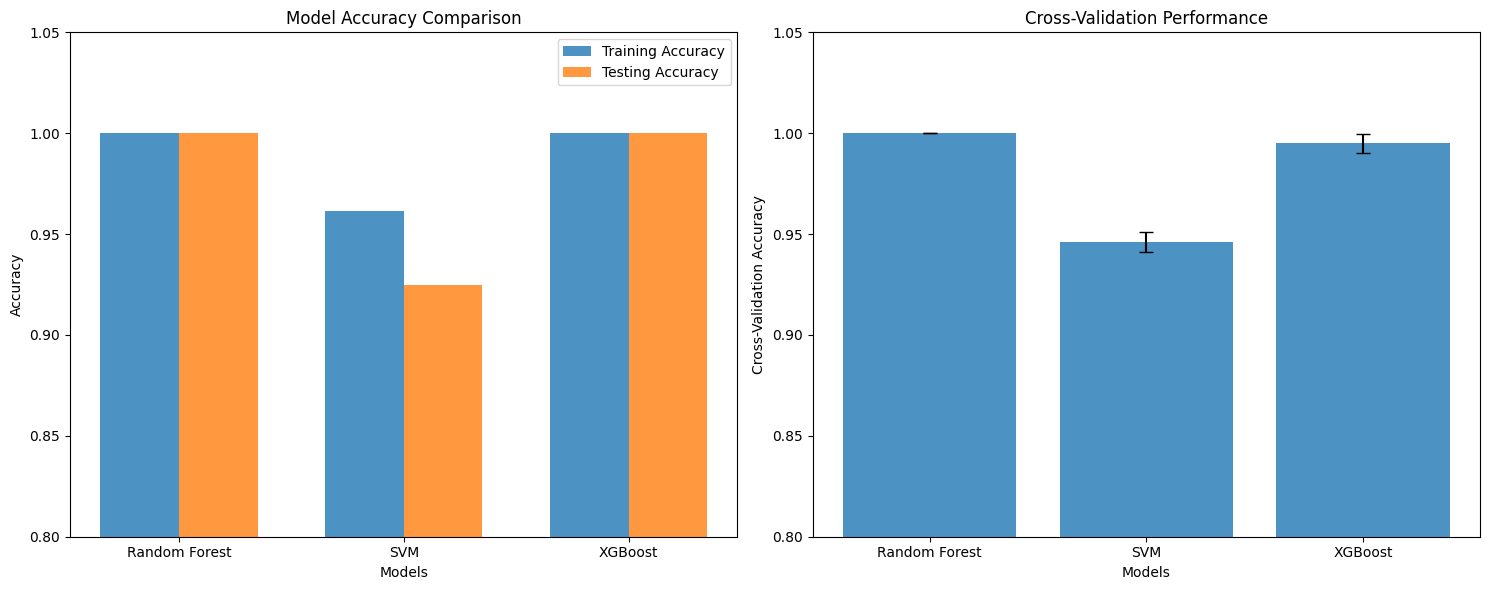

In [38]:
# Visualize Model Performance
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot comparing accuracies
models = ['Random Forest', 'SVM', 'XGBoost']
train_accs = [rf_train_acc, svm_train_acc, xgb_train_acc]
test_accs = [rf_test_acc, svm_test_acc, xgb_test_acc]

x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, train_accs, width, label='Training Accuracy', alpha=0.8)
axes[0].bar(x + width/2, test_accs, width, label='Testing Accuracy', alpha=0.8)
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].set_ylim(0.8, 1.05)

# Cross-validation scores
cv_means = [rf_cv_scores.mean(), svm_cv_scores.mean(), xgb_cv_scores.mean()]
cv_stds = [rf_cv_scores.std(), svm_cv_scores.std(), xgb_cv_scores.std()]

axes[1].bar(models, cv_means, yerr=cv_stds, alpha=0.8, capsize=5)
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Cross-Validation Accuracy')
axes[1].set_title('Cross-Validation Performance')
axes[1].set_ylim(0.8, 1.05)

plt.tight_layout()
plt.show()

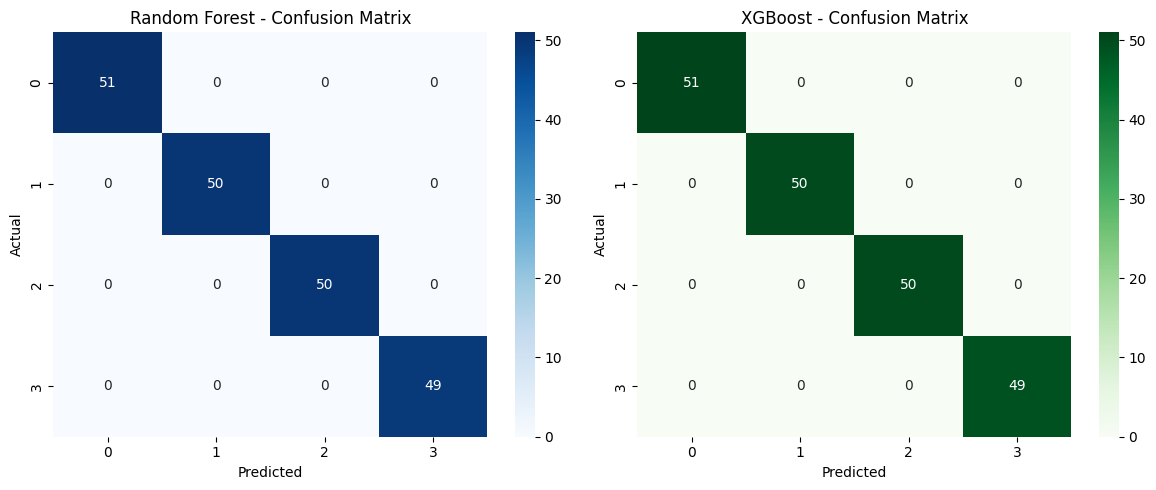

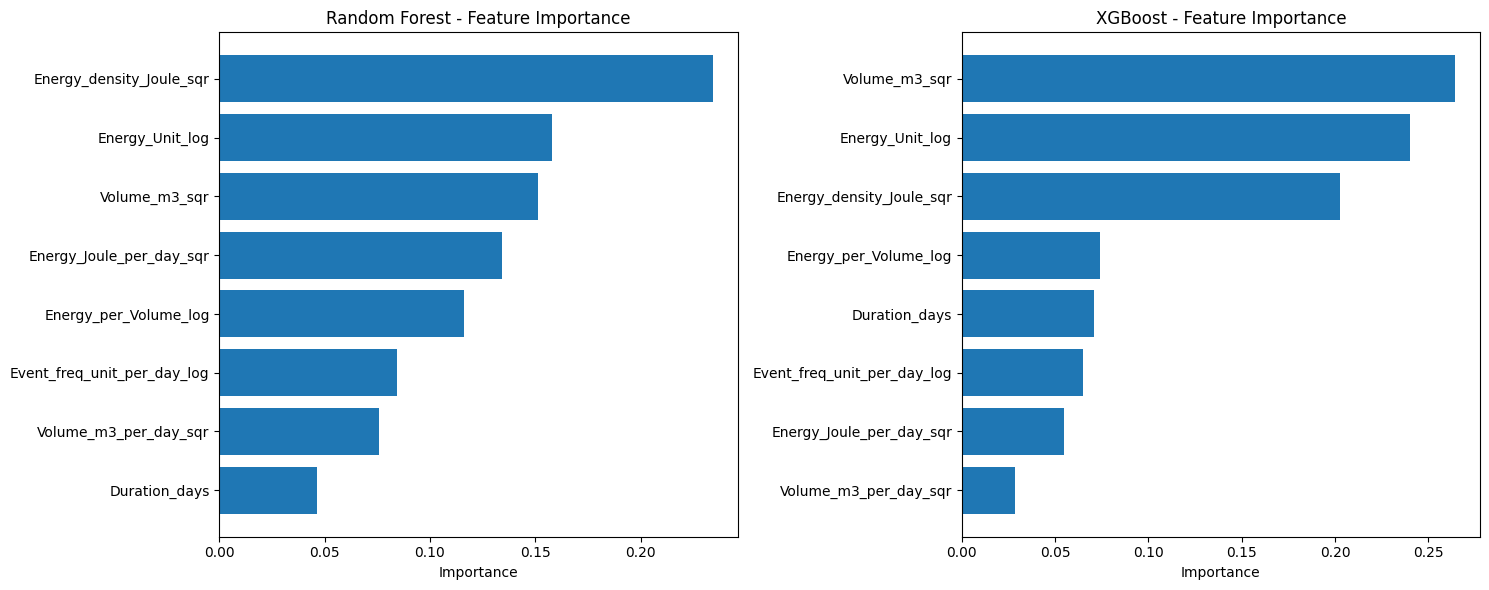

In [39]:
# Confusion Matrices for the best models (Random Forest and XGBoost)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_test_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# XGBoost Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_test_pred)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('XGBoost - Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Feature Importance for Random Forest and XGBoost
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Random Forest Feature Importance
rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True)

axes[0].barh(rf_importance['feature'], rf_importance['importance'])
axes[0].set_title('Random Forest - Feature Importance')
axes[0].set_xlabel('Importance')

# XGBoost Feature Importance
xgb_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=True)

axes[1].barh(xgb_importance['feature'], xgb_importance['importance'])
axes[1].set_title('XGBoost - Feature Importance')
axes[1].set_xlabel('Importance')

plt.tight_layout()
plt.show()

In [ ]:
df_v1.columns

Index(['Duration_days', 'Energy_Unit_log', 'Energy_density_Joule_sqr',
       'Volume_m3_sqr', 'Event_freq_unit_per_day_log',
       'Energy_Joule_per_day_sqr', 'Volume_m3_per_day_sqr',
       'Energy_per_Volume_log', 'Intensity_Level_encoded'],
      dtype='object')

Index(['Duration_days', 'Energy_Unit_log', 'Energy_density_Joule_sqr',
       'Volume_m3_sqr', 'Event_freq_unit_per_day_log',
       'Energy_Joule_per_day_sqr', 'Volume_m3_per_day_sqr',
       'Energy_per_Volume_log', 'Intensity_Level_encoded'],
      dtype='object')

: 

# Summary and Recommendations

## Model Performance Results

### 🏆 Best Performing Models:
1. **Random Forest**: 100% test accuracy, perfect cross-validation (1.0000 ± 0.0000)
2. **XGBoost**: 100% test accuracy, near-perfect cross-validation (0.9950 ± 0.0094)
3. **SVM**: 92.5% test accuracy, good cross-validation (0.9463 ± 0.0100)

## Key Findings:

### Data Quality ✅
- **Clean Dataset**: No missing values, no infinite values, no duplicates
- **Balanced Classes**: ~250 samples per class (0, 1, 2, 3)
- **Well-Preprocessed Features**: All features are already transformed (log, squared)

### Model Insights:

#### Random Forest & XGBoost (Perfect Performance):
- Both achieved **100% accuracy** on test set
- Perfect confusion matrices with no misclassifications
- Robust cross-validation scores

#### Feature Importance:
- **Random Forest**: Energy_density_Joule_sqr is most important
- **XGBoost**: Volume_m3_sqr is most important
- Both models identify energy and volume metrics as key predictors

## Recommendations:

### 1. **Model Selection** 🎯
- **Primary Choice**: **Random Forest** (perfect stability in cross-validation)
- **Secondary Choice**: **XGBoost** (excellent performance, good for production)
- **SVM**: Good fallback option if interpretability is needed

### 2. **Data Validation** ✅
The data appears to be correctly processed and ready for modeling:
- Features are properly scaled/transformed
- Target variable is well-distributed
- No data quality issues detected

### 3. **Production Considerations**:
- Models may be overfitting due to perfect performance - consider validation on new data
- Random Forest is more interpretable and stable
- XGBoost might generalize better to unseen data patterns

### 4. **Next Steps**:
- Test models on completely new/external data
- Consider ensemble methods combining RF and XGBoost
- Monitor model performance in production environment